In [1]:


suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))

figure_theme_path <- file.path(
    "..","visulaization_utils", "figure_themes.R")
source(figure_theme_path)

Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


In [ ]:
# define command line arguments
parser <- ArgumentParser(description = "Visualize MLP results")
# add arguments
parser$add_argument('--celltype', type='character', help='Cell type to visualize')
parser$add_argument('--model_name', type='character', help='Model name to visualize')
parser$add_argument('--selected_treatment_comparisons', type='character', help='Selected treatment comparisons to visualize')

# parse arguments from command line
args <- parser$parse_args()

# define cell type
celltype <- args$celltype
model_name <- args$model_name
selected_treatment_comparisons <- args$selected_treatment_comparisons


In [10]:
celltype  <- "SHSY5Y"
model_name <- "DMSO_0.025_vs_LPS_100"
selected_treatment_comparisons <- "DMSO_0.100_%_DMSO_0.025_% vs LPS_100.000_ug_per_ml_DMSO_0.025_%,DMSO_0.100_%_DMSO_0.025_% vs Thapsigargin_1.000_uM_DMSO_0.025_%,DMSO_0.100_%_DMSO_0.025_% vs Thapsigargin_10.000_uM_DMSO_0.025_%"

In [11]:
output_file <- file.path(
    "..","..","figures","Binary_Classification",model_name,celltype,"pr_curves_testing.png"
)

In [12]:
results_dir <- file.path(
    "..","..","results","Binary_Classification",model_name,celltype
)
results_file <- file.path(
    results_dir,"testing_metrics.csv"
)

# Read in the results file
df <- read.csv(results_file)
head(df,3)

,treatments_tested,model,group,shuffled_data,PR_Threshold,Precision,Recall
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,DMSO_0.100_%_DMSO_0.025_% vs LPS_100.000_ug_per_ml_DMSO_0.025_%,DMSO_0.025_vs_LPS_100,test,True,2.830257e-22,0.3096456,1
2,DMSO_0.100_%_DMSO_0.025_% vs LPS_100.000_ug_per_ml_DMSO_0.025_%,DMSO_0.025_vs_LPS_100,test,True,8.159433e-22,0.3096516,1
3,DMSO_0.100_%_DMSO_0.025_% vs LPS_100.000_ug_per_ml_DMSO_0.025_%,DMSO_0.025_vs_LPS_100,test,True,6.273121e-21,0.3096576,1


In [13]:
unique_treatments <- unique(df$treatments_tested)

In [14]:
# split string in R
selected_treatment_comparisons <- unlist(strsplit(selected_treatment_comparisons, split = ","))
selected_treatment_comparisons


[1] "DMSO_0.100_%_DMSO_0.025_% vs LPS_100.000_ug_per_ml_DMSO_0.025_%" 
[2] "DMSO_0.100_%_DMSO_0.025_% vs Thapsigargin_1.000_uM_DMSO_0.025_%" 
[3] "DMSO_0.100_%_DMSO_0.025_% vs Thapsigargin_10.000_uM_DMSO_0.025_%"

In [15]:
# subset the df to only include unique_treatments = treatment
tmp_df <- df[df$treatments_tested %in% selected_treatment_comparisons,]

In [17]:
tmp_df$treatments_tested <- gsub(" vs ", "\n", tmp_df$treatments_tested)

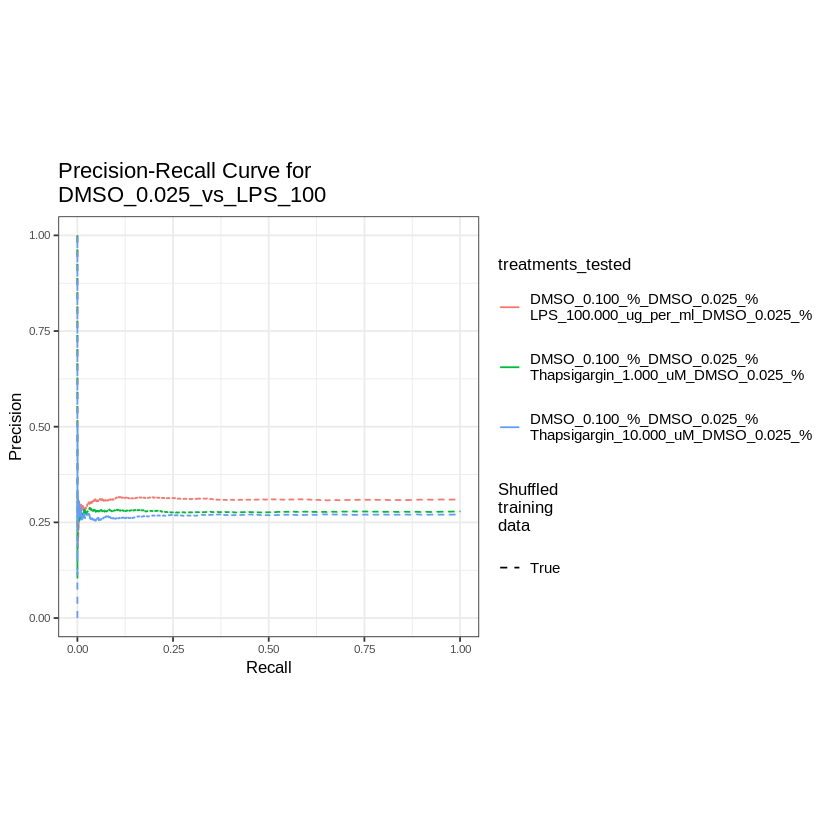

In [19]:
pr_curve_gg <- (
    ggplot(tmp_df, aes(x = Recall, y = Precision))
    + geom_line(aes(color = treatments_tested, linetype = shuffled_data))
    + theme_bw()
    + xlab("Recall")
    + ylab("Precision")
   
    # # set the colors of the lines
    # + scale_color_manual(
    #     name = "Data\nsplit",
    #     labels = data_split_labels,
    #     values = data_split_colors
    # )

    + scale_linetype_manual(
        name = "Shuffled\ntraining\ndata",
        labels = shuffled_labels,
        values = shuffled_linetypes
    )

    + guides(
        color = guide_legend(order = 1),
        linetype = guide_legend(order = 2),
    )
    + coord_fixed()
    + figure_theme
    # Decrease spacing in legend
    + theme(
        legend.spacing.y = unit(0.1, "cm"),
        legend.box.spacing = unit(0.2, "cm"),
        legend.key.size = unit(2.5, "lines"),
        legend.key.width = unit(1, "lines")
    )
    + ggtitle(paste0("Precision-Recall Curve for ","\n", model_name))
)

ggsave(output_file, pr_curve_gg, height = 5.5, width = 8.5, dpi = 500)
pr_curve_gg